In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carrega dados de texto
data = pd.read_csv("all_ECB_speeches.csv", sep="|", encoding="utf-8")
print("Shape DataFrame: ", data.shape)
print("Data size: ", data.shape[0])
data_drop_nan = data.dropna(subset=data.columns)
data.dropna(subset=data.columns, inplace=True)
print("Dropando NaN")
print("Data size: ", data_drop_nan.shape[0] )
data.head()

Shape DataFrame:  (2772, 5)
Data size:  2772
Dropando NaN
Data size:  2683


,date,speakers,title,subtitle,contents
0,2024-02-26,Christine Lagarde,European Parliament plenary debate on the ECB ...,"Speech by Christine Lagarde, President of the ...",SPEECH European Parliament plenary debate ...
2,2024-02-16,Isabel Schnabel,From laggard to leader? Closing the euro area’...,Inaugural lecture of the EMU Lab by Isabel Sch...,SPEECH From laggard to leader? Closing the ...
4,2024-02-15,Christine Lagarde,Hearing of the Committee on Economic and Monet...,"Speech by Christine Lagarde, President of the ...",SPEECH Hearing of the Committee on Economic...
6,2024-02-14,Piero Cipollone,Preserving people’s freedom to use a public me...,"Introductory statement by Piero Cipollone, Mem...",SPEECH Preserving people’s freedom to ...
7,2024-02-14,Luis de Guindos,"Monetary policy, financial stability and mediu...","Speech by Luis de Guindos, Vice-President of t...","SPEECH Monetary policy, financial stability..."


In [5]:
# Uso do dicionário de sentimentos NRC
#Cria um dicionário com as palavras positivas e um com as negativas

negative_dict = {}

with open("./data/negative-NRC-Emotion-Lexicon.txt", "r") as file:
    for line in file:
        key, value = line.strip().split("\t")
        if value != "0":
            negative_dict[key] = int(value)

print(negative_dict)

positive_dict = {}

with open("./data/positive-NRC-Emotion-Lexicon.txt", "r") as file:
    for line in file:
        key, value = line.strip().split("\t")
        if value != "0":
            positive_dict[key] = int(value)

print(positive_dict)

{'dementia': 1, 'elimination': 1, 'pathetic': 1, 'lower': 1, 'gasping': 1, 'leech': 1, 'detritus': 1, 'suspension': 1, 'outhouse': 1, 'hobo': 1, 'addiction': 1, 'onus': 1, 'incomprehensible': 1, 'scarcity': 1, 'torture': 1, 'bigoted': 1, 'infiltration': 1, 'inefficient': 1, 'chafing': 1, 'enigmatic': 1, 'payment': 1, 'perversion': 1, 'evacuation': 1, 'hangman': 1, 'turbulence': 1, 'rat': 1, 'strike': 1, 'carnal': 1, 'confined': 1, 'egotistical': 1, 'freezing': 1, 'declination': 1, 'presentment': 1, 'subsidence': 1, 'carelessness': 1, 'clump': 1, 'spurious': 1, 'nihilism': 1, 'resigned': 1, 'prodigal': 1, 'fruitless': 1, 'slaughterhouse': 1, 'income': 1, 'disapproving': 1, 'confiscate': 1, 'poorly': 1, 'clouded': 1, 'poverty': 1, 'screwed': 1, 'crisp': 1, 'horrific': 1, 'injury': 1, 'unhappy': 1, 'sorely': 1, 'harass': 1, 'gap': 1, 'hypocritical': 1, 'havoc': 1, 'dagger': 1, 'lonely': 1, 'rekindle': 1, 'decrepit': 1, 'misrepresent': 1, 'remorse': 1, 'whore': 1, 'ulterior': 1, 'woefully'

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

C:\Users\Lavin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


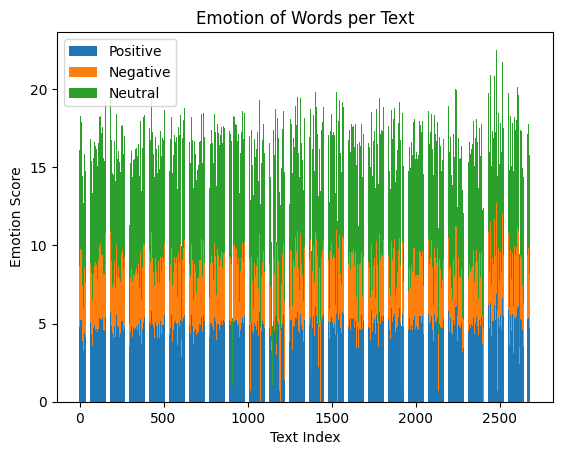

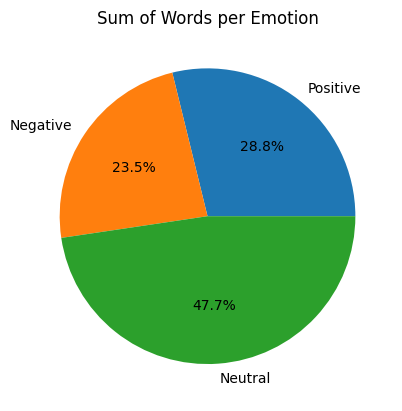

In [6]:
# Função para calcular o sentimento de um texto

def get_sentiment(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        if word in positive_dict:
            positive_score += positive_dict[word]
            if word in negative_dict:
                negative_score += negative_dict[word]
        elif word in negative_dict:
            negative_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])
    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

# Teste da função
emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_dict.append(np.nan)
    else:
        outputs, emotions_per_text = get_sentiment(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

import matplotlib.pyplot as plt
import math as m

# Extract the emotion scores from the emotions_per_text variable
positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Importar a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()



In [8]:
# Uso do dicionário de sentimentos MCLou

filepath = './data/mclou.csv'
mclou = pd.read_csv(filepath, sep=';', encoding='utf-8')

mclou_dict = {str(mclou['Word'][i]).lower(): [mclou['Positive'][i], mclou['Negative'][i]] for i in range(len(mclou))}
for key, value in mclou_dict.items():
    if mclou_dict[key][0] != 0:
        mclou_dict[key][0] = 1
    if mclou_dict[key][1] != 0:
        mclou_dict[key][1] = 1

for i in range(10):
    print(mclou['Word'][i], mclou['Positive'][i], mclou['Negative'][i])
    print(mclou_dict[str(mclou['Word'][i]).lower()])


AARDVARK 0 0
[0, 0]
AARDVARKS 0 0
[0, 0]
ABACI 0 0
[0, 0]
ABACK 0 0
[0, 0]
ABACUS 0 0
[0, 0]
ABACUSES 0 0
[0, 0]
ABAFT 0 0
[0, 0]
ABALONE 0 0
[0, 0]
ABALONES 0 0
[0, 0]
ABANDON 0 2009
[0, 1]


['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

C:\Users\Lavin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


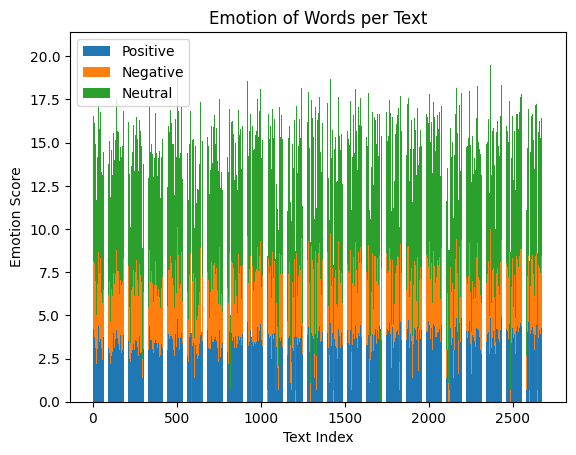

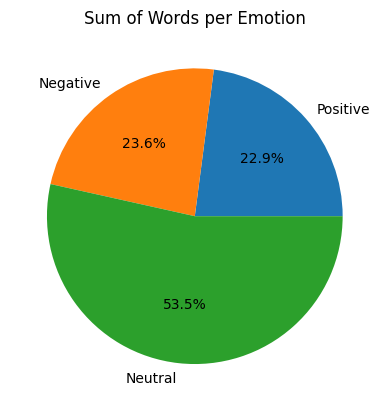

In [9]:
# Função para calcular o sentimento de um texto usando o dicionário MCLou

def get_sentiment_mclou(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        word = word.lower()
        if word in mclou_dict:
            positive_score += mclou_dict[word][0]
            negative_score += mclou_dict[word][1]
            if mclou_dict[word][0] == 0 and mclou_dict[word][1] == 0:
                neutral_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])
    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

# Teste da função
emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_dict.append(np.nan)
    else:
        outputs, emotions_per_text = get_sentiment_mclou(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

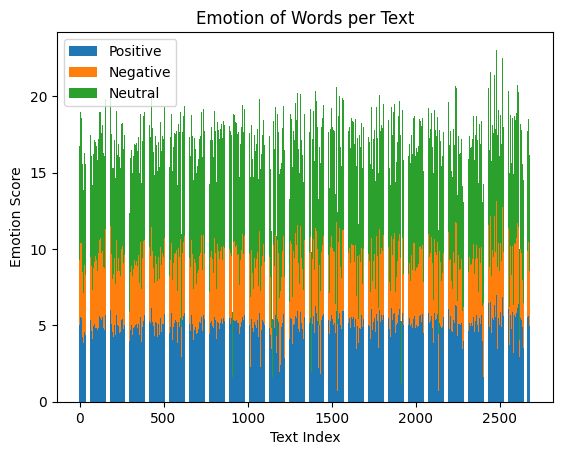

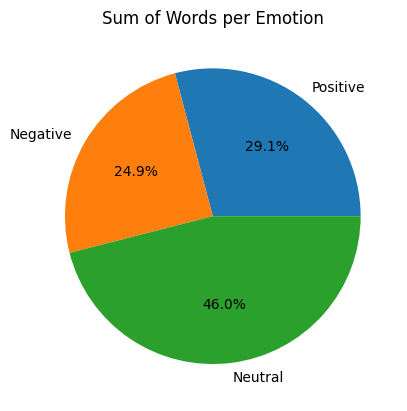

In [10]:
# Função para calcular o sentimento de um texto usando os dicionários MCLou e NRC
# Se a palavra estiver em um dos dicionários, ela é incrementada como positiva ou negativa
# Se a palavra não estiver em nenhum dos dicionários, ela é incrementada como neutra
# Se a palavra estiver nos dois dicionários, ela pode ser incrementada como positiva e/ou negativa

def get_sentiment_double(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        word = word.lower()
        if word in mclou_dict:
            if word in positive_dict or mclou_dict[word][0] != 0:
                positive_score += 1
            if word in negative_dict or mclou_dict[word][1] != 0:
                negative_score += 1
            if (mclou_dict[word][0] == 0 and mclou_dict[word][1] == 0) or (word not in positive_dict and word not in negative_dict):
                neutral_score += 1
        elif word in positive_dict:
            positive_score += 1
        elif word in negative_dict:
            negative_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])

    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

# Teste da função
emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_dict.append(np.nan)
    else:
        outputs, emotions_per_text = get_sentiment_double(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()

In [11]:
from transformers import T5Model
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments,  BertForPreTraining
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk

In [12]:
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
labels = model.config.id2label
print("Maximum sequence length of 512 tokens")
print("Etiquetas do modelo:", labels)

Maximum sequence length of 512 tokens
Etiquetas do modelo: {0: 'positive', 1: 'negative', 2: 'neutral'}


In [13]:
exemplo_1 = " Pre-tax loss totaled euro 0.3 million , compared to a loss of euro 2.2 million in the first quarter of 2005 ."
exemplo_2 = " This implementation is very important to the operator , since it is about to launch its Fixed to Mobile convergence service in Brazil "
exemplo_3 = " The situation of coated magazine printing paper will continue to be weak ."
exemplo_4 = " The committee judges that the case for an increase in the federal funds rate has continued to strengthen but decided, for the time being, to wait for some further evidence of continued progress toward its objectives."
exemplo_5 = "The committee will closely monitor market conditions and is prepared to adjust its plans as appropriate."
exemplo_6 = "Labor market conditions have shown some improvement in recent months, on balance, but the unemployment rate remains elevated."
exemplo_7 = "In light of the current shortfall of inflation from 2 percent, the committee will carefully monitor actual and expected progress toward its inflation goal."
exemplo_8 = " The committee expects to begin implementing its balance sheet normalization program relatively soon, provided that the economy evolves broadly as anticipated; this program is described in the June 2017 addendum to the committee’s policy normalization principles and plans."
exemplo_list = [exemplo_1, exemplo_2, exemplo_3, exemplo_4, exemplo_5, exemplo_6, exemplo_7, exemplo_8]
exemplo_labels = ["positive", "neutral", "negative", "positive", "neutral", "negative", "negative", "positive"]

In [14]:
emo_bert_score = []
for exemplo, exemplo_label in zip(exemplo_list, exemplo_labels):
    exemplo = exemplo.split(",")
    sum_states = []
    for sentence in exemplo:
        inputs = tokenizer(sentence, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        outputs = model(**inputs)
        sum_states.append(np.array(outputs[0].tolist()))
    sum_states = np.sum(sum_states, axis=0)
    emo_bert_score.append(sum_states)
    prediction = labels[np.argmax(sum_states)]
    print("Last hidden states: ", sum_states)
    print("Prediction: ", prediction, end="               ")
    print("True Value: ", exemplo_label)

Last hidden states:  [[-0.29729652  1.2030194  -0.62639511]]
Prediction:  negative               True Value:  positive
Last hidden states:  [[ 1.57149011 -5.26005173  3.76658821]]
Prediction:  neutral               True Value:  neutral
Last hidden states:  [[-1.44220924  1.98019981 -0.29900157]]
Prediction:  negative               True Value:  negative
Last hidden states:  [[ 2.72727147 -4.72815317  1.63773316]]
Prediction:  positive               True Value:  positive
Last hidden states:  [[ 0.05032764 -2.00168133  2.11460161]]
Prediction:  neutral               True Value:  neutral
Last hidden states:  [[ 1.36785353 -1.10852122 -1.08556223]]
Prediction:  positive               True Value:  negative
Last hidden states:  [[ 1.1668939  -2.38015541  0.98015815]]
Prediction:  positive               True Value:  negative
Last hidden states:  [[ 1.98249722 -5.07666588  2.72255689]]
Prediction:  neutral               True Value:  positive


In [15]:
emo_dict_score = []

for exemplo, exemplo_label in zip(exemplo_list, exemplo_labels):
  exemplo = exemplo.split(",")
  sum_states = []
  for sentence in exemplo:
    sent, sum_states = get_sentiment_double(sentence, sum_states)
  sum_states = np.sum(sum_states, axis=0)
  emo_dict_score.append(sum_states)
  prediction = labels[np.argmax(sum_states)]
  print("Last hidden states: ", sum_states)
  print("Prediction: ", prediction, end="               ")
  print("True Value: ", exemplo_label)

Last hidden states:  [ 0  2 19]
Prediction:  neutral               True Value:  positive
Last hidden states:  [ 2  0 22]
Prediction:  neutral               True Value:  neutral
Last hidden states:  [ 1  1 13]
Prediction:  neutral               True Value:  negative
Last hidden states:  [ 3  2 34]
Prediction:  neutral               True Value:  positive
Last hidden states:  [ 1  0 16]
Prediction:  neutral               True Value:  neutral
Last hidden states:  [ 4  2 17]
Prediction:  neutral               True Value:  negative
Last hidden states:  [ 3  3 23]
Prediction:  neutral               True Value:  negative
Last hidden states:  [ 1  0 38]
Prediction:  neutral               True Value:  positive


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['negative', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'positive', 'neutral']
['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


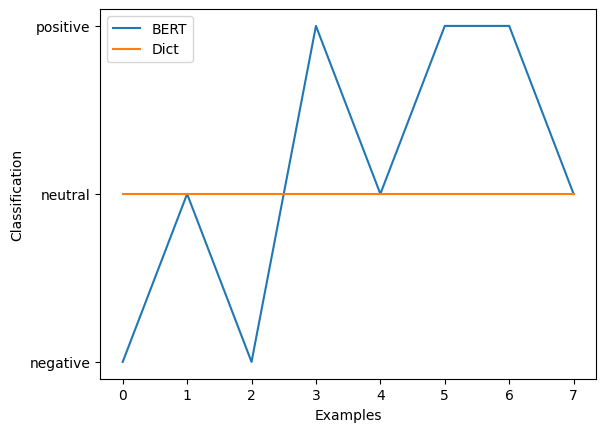

In [16]:
import matplotlib.pyplot as plt

# Dados de exemplo
exemplos = exemplo_list
classificacoes = exemplo_labels

# Criar figura e eixos
fig, ax = plt.subplots()

# Plotar gráfico de linhas
# ax.plot(exemplos, classificacoes, label='BERT')
# ax.plot(exemplos, classificacoes, label='Dict')

# Definir rótulos dos eixos
ax.set_xlabel('Exemplos')
ax.set_ylabel('Classificação')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
import matplotlib.pyplot as plt

# Extract the scores from emo_bert_score and emo_dict_score
bert_scores = [np.argmax(score) for score in emo_bert_score]
for i in range(len(bert_scores)):
    if bert_scores[i] == 0:
        bert_scores[i] = "positive"
    elif bert_scores[i] == 1:
        bert_scores[i] = "negative"
    else:
        bert_scores[i] = "neutral"
print(bert_scores)
dict_scores = [np.argmax(score) for score in emo_dict_score]
for i in range(len(dict_scores)):
    if dict_scores[i] == 0:
        dict_scores[i] = "positive"
    elif dict_scores[i] == 1:
        dict_scores[i] = "negative"
    else:
        dict_scores[i] = "neutral"
print(dict_scores)

# Create the x-axis values (examples)
examples = range(len(bert_scores))

# Create the line graph
plt.plot(examples, bert_scores, label='BERT')
plt.plot(examples, dict_scores, label='Dict')

# Set the labels for the x-axis and y-axis
plt.xlabel('Examples')
plt.ylabel('Classification')

# Add a legend
plt.legend()

# Show the graph
plt.show()


In [17]:
def get_sentiment_double(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    last_emo = [0, 0, 1]
    for word in text:
        word = word.lower()
        if word in mclou_dict:
            if word in positive_dict or mclou_dict[word][0] != 0:
                if last_emo != [1, 0, 0]:
                  positive_score += 1
                  last_emo = [1, 0, 0]
            if word in negative_dict or mclou_dict[word][1] != 0:
                if last_emo != [0, 1, 0]:
                  negative_score += 1
                  last_emo = [0, 1, 0]
            if (mclou_dict[word][0] == 0 and mclou_dict[word][1] == 0) or (word not in positive_dict and word not in negative_dict):
                if last_emo != [0, 0, 1]:
                  neutral_score += 1
                  last_emo = [0, 0, 1]
        elif word in positive_dict:
            if last_emo != [1, 0, 0]:
              positive_score += 1
              last_emo = [1, 0, 0]
        elif word in negative_dict:
            if last_emo != [0, 1, 0]:
              negative_score += 1
              last_emo = [0, 1, 0]
        else:
            if last_emo != [0, 0, 1]:
              neutral_score += 1
              last_emo = [0, 0, 1]
    score = [positive_score, negative_score, neutral_score]
    print(score)
    for i in range(len(score)):
        score[i] = max(0, score[i] + 1 - max(score))
    print(score)
    emo_score.append(score)

    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

emo_dict_score = []

for exemplo, exemplo_label in zip(exemplo_list, exemplo_labels):
  exemplo = exemplo.split(",")
  sum_states = []
  for sentence in exemplo:
    sent, sum_states = get_sentiment_double(sentence, sum_states)
  sum_states = np.sum(sum_states, axis=0)
  emo_dict_score.append(sum_states)
  # prediction = labels[np.argmax(sum_states)]
  if sum_states[0] > sum_states[1] and sum_states[0] > sum_states[2]:
    prediction = "positive"
  elif sum_states[1] > sum_states[0] and sum_states[1] > sum_states[2]:
    prediction = "negative"
  else:
    prediction = "neutral"
  print("Last hidden states: ", sum_states)
  print("Prediction: ", prediction, end="               ")
  print("True Value: ", exemplo_label)

[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
Last hidden states:  [0 2 2]
Prediction:  neutral               True Value:  positive
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
Last hidden states:  [2 0 2]
Prediction:  neutral               True Value:  neutral
[1, 1, 2]
[0, 0, 1]
Last hidden states:  [0 0 1]
Prediction:  neutral               True Value:  negative
[2, 1, 3]
[0, 0, 1]
[0, 0, 0]
[1, 0, 0]
[1, 1, 2]
[0, 0, 1]
Last hidden states:  [1 0 2]
Prediction:  neutral               True Value:  positive
[1, 0, 1]
[1, 0, 1]
Last hidden states:  [1 0 1]
Prediction:  neutral               True Value:  neutral
[2, 0, 2]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 2, 2]
[0, 1, 1]
Last hidden states:  [2 1 3]
Prediction:  neutral               True Value:  negative
[0, 2, 2]
[0, 1, 1]
[3, 1, 4]
[0, 0, 1]
Last hidden states:  [0 1 2]
Prediction:  neutral               True Value:  negative
[1, 0, 1]
[1, 0, 1]
[0, 0, 0]
[1, 0, 0]
Last hidden states:  [2 0 1]
Prediction:  positive               True Value:  po

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['negative', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'positive', 'neutral']
['negative', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive']


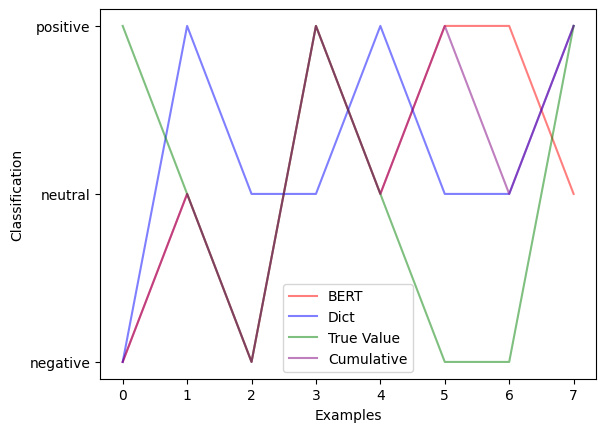

[0 1 2 3 4 5 6 7]
[1. 1. 1. 1. 1. 1. 1. 1.]


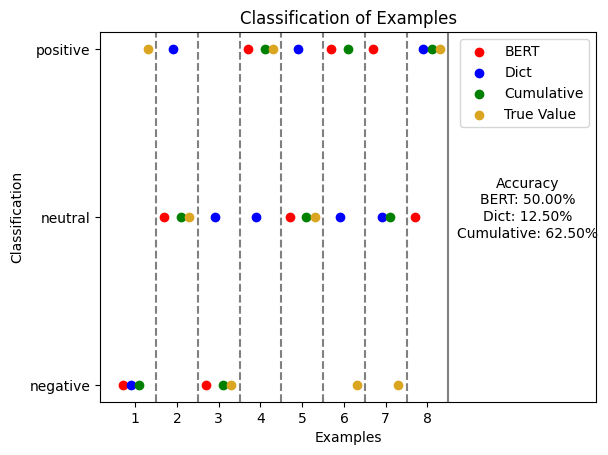

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
exemplos = exemplo_list
classificacoes = exemplo_labels

# Criar figura e eixos
fig, ax = plt.subplots()

# Plotar gráfico de linhas
# ax.plot(exemplos, classificacoes, label='BERT')
# ax.plot(exemplos, classificacoes, label='Dict')

# Definir rótulos dos eixos
ax.set_xlabel('Exemplos')
ax.set_ylabel('Classificação')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
import matplotlib.pyplot as plt

# Extract the scores from emo_bert_score and emo_dict_score
bert_scores = [np.argmax(score) for score in emo_bert_score]
for i in range(len(bert_scores)):
    if bert_scores[i] == 0:
        bert_scores[i] = "positive"
    elif bert_scores[i] == 1:
        bert_scores[i] = "negative"
    else:
        bert_scores[i] = "neutral"
print(bert_scores)
dict_scores = [np.argmax(score) for score in emo_dict_score]
for i in range(len(dict_scores)):
    if dict_scores[i] == 0:
        dict_scores[i] = "positive"
    elif dict_scores[i] == 1:
        dict_scores[i] = "negative"
    else:
        dict_scores[i] = "neutral"
print(dict_scores)
cumulative_scores = [np.argmax(emo_bert_score[i] + emo_dict_score[i]) for i in range(len(emo_bert_score))]
for i in range(len(cumulative_scores)):
    if cumulative_scores[i] == 0:
        cumulative_scores[i] = "positive"
    elif cumulative_scores[i] == 1:
        cumulative_scores[i] = "negative"
    else:
        cumulative_scores[i] = "neutral"

# Create the x-axis values (examples)
examples = range(len(bert_scores))

# Create the line graph
plt.plot(examples, bert_scores, label='BERT', alpha=0.5, color='red')
plt.plot(examples, dict_scores, label='Dict', alpha=0.5, color='blue')
plt.plot(examples, exemplo_labels, label='True Value', alpha=0.5, color='green')
plt.plot(examples, cumulative_scores, label='Cumulative', alpha=0.5, color='purple')

# Set the labels for the x-axis and y-axis
plt.xlabel('Examples')
plt.ylabel('Classification')

# Add a legend
plt.legend()

# Show the graph
plt.show()



import matplotlib.pyplot as plt
# Transform the data
# transformed_examples = [example + np.random.normal() for example in examples]
examples = np.array(examples)
print(examples)
print(np.ones(examples.shape))

# # Create the scatter plot
# # plt.scatter(examples+np.ones(examples.shape)*np.random.normal(), bert_scores, label='BERT', alpha=0.5, color='red')
# plt.scatter(examples - np.ones(examples.shape)*0.3, bert_scores, label='BERT', color='red')
# plt.scatter(examples-np.ones(examples.shape)*0.1, dict_scores, label='Dict', color='blue')
# plt.scatter(examples+np.ones(examples.shape)*0.1, cumulative_scores, label='Cumulative', color='green')
# plt.scatter(examples+np.ones(examples.shape)*0.3, exemplo_labels, label='True Value', color='goldenrod')
# plt.scatter(10.5, 'negative', color='white')

# # Add vertical lines
# plt.axvline(x=0.5, color='gray', linestyle='--')
# plt.axvline(x=1.5, color='gray', linestyle='--')
# plt.axvline(x=2.5, color='gray', linestyle='--')
# plt.axvline(x=3.5, color='gray', linestyle='--')
# plt.axvline(x=4.5, color='gray', linestyle='--')
# plt.axvline(x=5.5, color='gray', linestyle='--')
# plt.axvline(x=6.5, color='gray', linestyle='--')
# plt.axvline(x=7.5, color='gray', linestyle='-')

# classification_frequency = {}

# for i in range(len(exemplo_labels)):
#     if exemplo_labels[i] in classification_frequency:
#         classification_frequency[exemplo_labels[i]] += 1
#     else:
#         classification_frequency[exemplo_labels[i]] = 1

# print(classification_frequency)


# # Set the labels for the x-axis and y-axis
# plt.xlabel('Examples')
# plt.ylabel('Classification')
# plt.xticks(range(8), examples+1)

# # Calculate accuracy for BERT
# bert_accuracy = sum([1 for i in range(len(bert_scores)) if bert_scores[i] == exemplo_labels[i]]) / len(bert_scores) * 100
# print(f"Accuracy for BERT: {bert_accuracy}%")

# # Calculate accuracy for Dict
# dict_accuracy = sum([1 for i in range(len(dict_scores)) if dict_scores[i] == exemplo_labels[i]]) / len(dict_scores) * 100
# print(f"Accuracy for Dict: {dict_accuracy}%")

# # Calculate accuracy for Cumulative
# cumulative_accuracy = sum([1 for i in range(len(cumulative_scores)) if cumulative_scores[i] == exemplo_labels[i]]) / len(cumulative_scores) * 100
# print(f"Accuracy for Cumulative: {cumulative_accuracy}%")

# Create the scatter plot
plt.scatter(examples - np.ones(examples.shape)*0.3, bert_scores, label='BERT', color='red')
plt.scatter(examples-np.ones(examples.shape)*0.1, dict_scores, label='Dict', color='blue')
plt.scatter(examples+np.ones(examples.shape)*0.1, cumulative_scores, label='Cumulative', color='green')
plt.scatter(examples+np.ones(examples.shape)*0.3, exemplo_labels, label='True Value', color='goldenrod')
plt.scatter(10.5, 'negative', color='white')

# Add vertical lines
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.axvline(x=1.5, color='gray', linestyle='--')
plt.axvline(x=2.5, color='gray', linestyle='--')
plt.axvline(x=3.5, color='gray', linestyle='--')
plt.axvline(x=4.5, color='gray', linestyle='--')
plt.axvline(x=5.5, color='gray', linestyle='--')
plt.axvline(x=6.5, color='gray', linestyle='--')
plt.axvline(x=7.5, color='gray', linestyle='-')

classification_frequency = {}

for i in range(len(exemplo_labels)):
    if exemplo_labels[i] in classification_frequency:
        classification_frequency[exemplo_labels[i]] += 1
    else:
        classification_frequency[exemplo_labels[i]] = 1

# Set the labels for the x-axis and y-axis
plt.xlabel('Examples')
plt.ylabel('Classification')
plt.xticks(range(8), examples+1)

plt.text(9.4, 1.2, "Accuracy", ha='center', va='center')

# Calculate accuracy for BERT
bert_accuracy = sum([1 for i in range(len(bert_scores)) if bert_scores[i] == exemplo_labels[i]]) / len(bert_scores) * 100
plt.text(9.4, 1.1, f"BERT: {bert_accuracy:.2f}%", ha='center', va='center')

# Calculate accuracy for Dict
dict_accuracy = sum([1 for i in range(len(dict_scores)) if dict_scores[i] == exemplo_labels[i]]) / len(dict_scores) * 100
plt.text(9.4, 1, f"Dict: {dict_accuracy:.2f}%", ha='center', va='center')

# Calculate accuracy for Cumulative
cumulative_accuracy = sum([1 for i in range(len(cumulative_scores)) if cumulative_scores[i] == exemplo_labels[i]]) / len(cumulative_scores) * 100
plt.text(9.4, 0.9, f"Cumulative: {cumulative_accuracy:.2f}%", ha='center', va='center')

plt.title('Classification of Examples')
plt.legend()

# Show the plot
plt.show()
